
<br>
    The objective of this exercise is to study the signal of ECG during atrial<br>
    fibrilation (AF). The signal analysed contains different type of AF with<br>
    stable repolarisation loops and random AF.<br>


In [ ]:
import numpy as np
import pylab as py
py.ion()
py.close('all')
import scipy.signal as sp

<br>
    The first signal is an ECG with atrial fibrilation.<br>
    Q: What are the differences of this ECG with a normal ECG?<br>

**Answer:**<br>
- The ECG with atrial fibrillation lacks the regular, distinct P waves seen in normal ECGs, reflecting disorganized atrial activity.
- The R-R intervals (time between heartbeats) are highly irregular, whereas they are regular in normal sinus rhythm.
- The baseline may appear more chaotic or noisy due to the absence of coordinated atrial depolarization.

In [59]:
ecg = np.genfromtxt('ecg_af.dat')
ecg_fs = 300
t_ecg = np.arange(len(ecg))/ecg_fs

(210.0, 215.0)

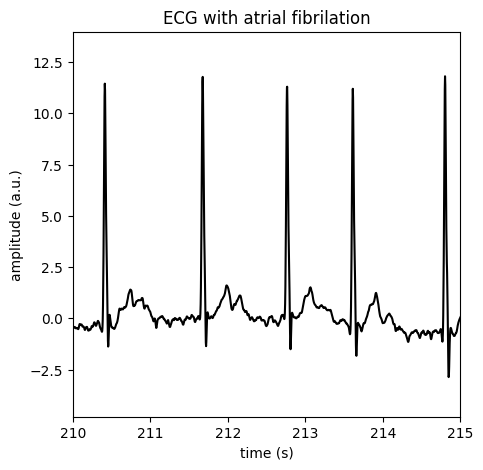

In [60]:
py.figure(1,figsize=[5,5])
py.plot(t_ecg, ecg, 'k')
py.xlabel('time (s)')
py.ylabel('amplitude (a.u.)')
py.title('ECG with atrial fibrilation')
py.xlim(210, 215)

<br>
We compute the autocorrelation of the ECG signal. In order to discard the modulation of the baseline we first apply a high-pass filter with a cut-off frequency of 0.5 Hz.<br>

Q: Do you see a specific pattern that permits to characterize the atrial fibrillation?<br>
**Answer:**
- The autocorrelation of the ECG signal with atrial fibrillation typically shows reduced periodicity and less pronounced peaks compared to normal sinus rhythm. This reflects the irregular timing of heartbeats and the absence of organized atrial activity. The lack of regular repeating patterns in the autocorrelation is a sign of atrial fibrillation.

In [4]:
b, a = sp.butter(2, 0.5/ecg_fs*2, btype='high')

In [5]:
ecg_hp = sp.filtfilt(b, a, ecg)

In [6]:
rxx_ecg = np.correlate(ecg_hp, ecg_hp, mode='full') 
k = np.arange(len(rxx_ecg))-len(rxx_ecg)//2

(-500.0, 500.0)

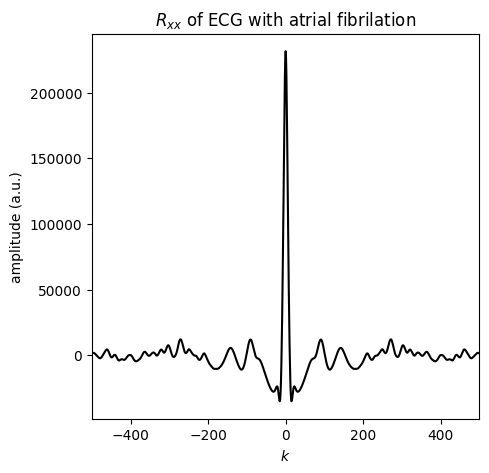

In [64]:
py.figure(2,figsize=[5,5])
py.plot(k, rxx_ecg, 'k')
py.xlabel('$k$')
py.ylabel('amplitude (a.u.)')
py.title('$R_{xx}$ of ECG with atrial fibrilation')
py.xlim(-500, 500)

<br>
Compute the PSD of the ECG signal.<br>

Q: What do you see?<br>
**Answer:**
- The PSD of the ECG signal with atrial fibrillation shows a broad frequency distribution, with less distinct peaks compared to normal rhythm. This indicates a more chaotic and less organized electrical activity in the atria. The absence of sharp peaks at regular intervals is characteristic of atrial fibrillation.

In [7]:
f, ECG = sp.welch(ecg_hp, nperseg=500, nfft=4096, noverlap=250, fs=ecg_fs)

(0.0, 60.0)

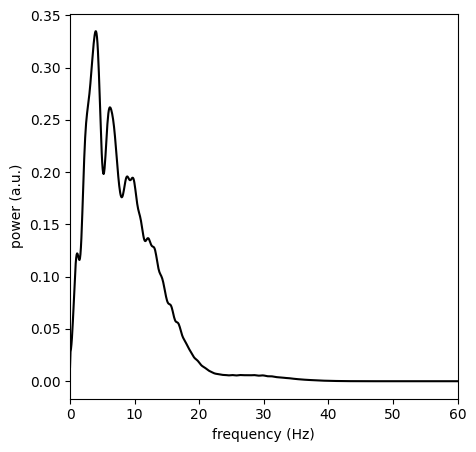

In [8]:
py.figure(3, figsize=[5,5])
py.clf()
py.plot(f, ECG, 'k')
py.xlabel('frequency (Hz)')
py.ylabel('power (a.u.)')
py.xlim(0,60)

<br>
In order to highlight the signal related to the repolarisation of the atria, the ECG signal with atrial fibrillation has been processed, keeping only the P wave (repolarisation of the atria) and the QRST waves have been removed. During the measurement 4 time segments exhibit different behaviors.<br>

Q: What are the differences between the different segments?<br>
**Answer:**
- The different segments may show varying degrees of organization in the P wave signal. Some segments may exhibit more regular oscillations, while others appear more chaotic or noisy. This is due to the fact that atrial fibrilation can have periods of relative organization and periods of highly irregular activity. The presence or absence of sustained oscillatory patterns in the P wave can help characterize the underlying atrial activity.

In [9]:
p_wave = np.genfromtxt('AF_sync.dat')
p_wave_fs = 50
t_p_wave = np.arange(len(p_wave))/p_wave_fs

In [10]:
segments = [1500, 2000, 2500, 3000, 3500]

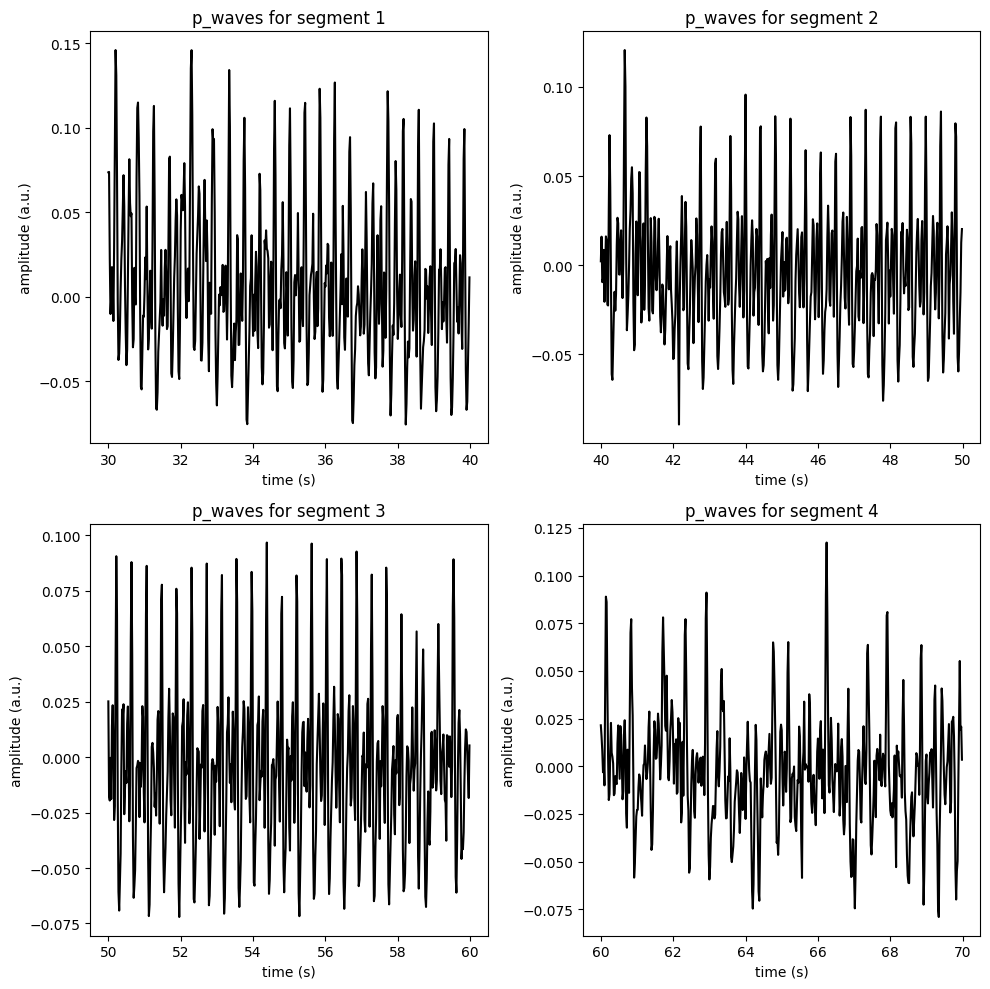

In [11]:
py.figure(4,figsize=[10,10])
for n in range(len(segments)-1):
    py.subplot(2, 2, int(n+1))
    idx = np.arange(segments[n], segments[n+1])
    py.plot(t_p_wave[idx], p_wave[idx], 'k')
    py.xlabel('time (s)')
    py.ylabel('amplitude (a.u.)')
    py.title('p_waves for segment '+str(n+1))
    py.tight_layout()

<br>
We compute the autocorrelation of the p_wave signal. In order to discard the modulation of the baseline we first apply a high-pass filter with a cut-off frequency of 0.5 Hz.<br>

Q: Do you see a specific pattern that permits to characterize the atrial fibrillation?<br>
**Answer:**
- The autocorrelation of the p_wave signal in atrial fibrillation generally lacks strong, regular peaks, reflecting the disorganized and chaotic nature of atrial activity. Some segments may show weak or irregular periodicity, but overall, the absence of consistent repeating patterns in the autocorrelation is characteristic of atrial fibrillation.

Q: Discuss the organisation of the signals. Which one is the more organised, which one is closer to a noise?<br>
**Answer:**
- Segments with clear, repeating peaks in the autocorrelation are more organized and may represent periods of partial atrial coordination. Segments with flat or noisy autocorrelation are less organized and resemble random noise, typical of chaotic atrial fibrillation. By this reasoning the signal for segment 4 is closer to a noise, and the signal for segment 1 is more organised.

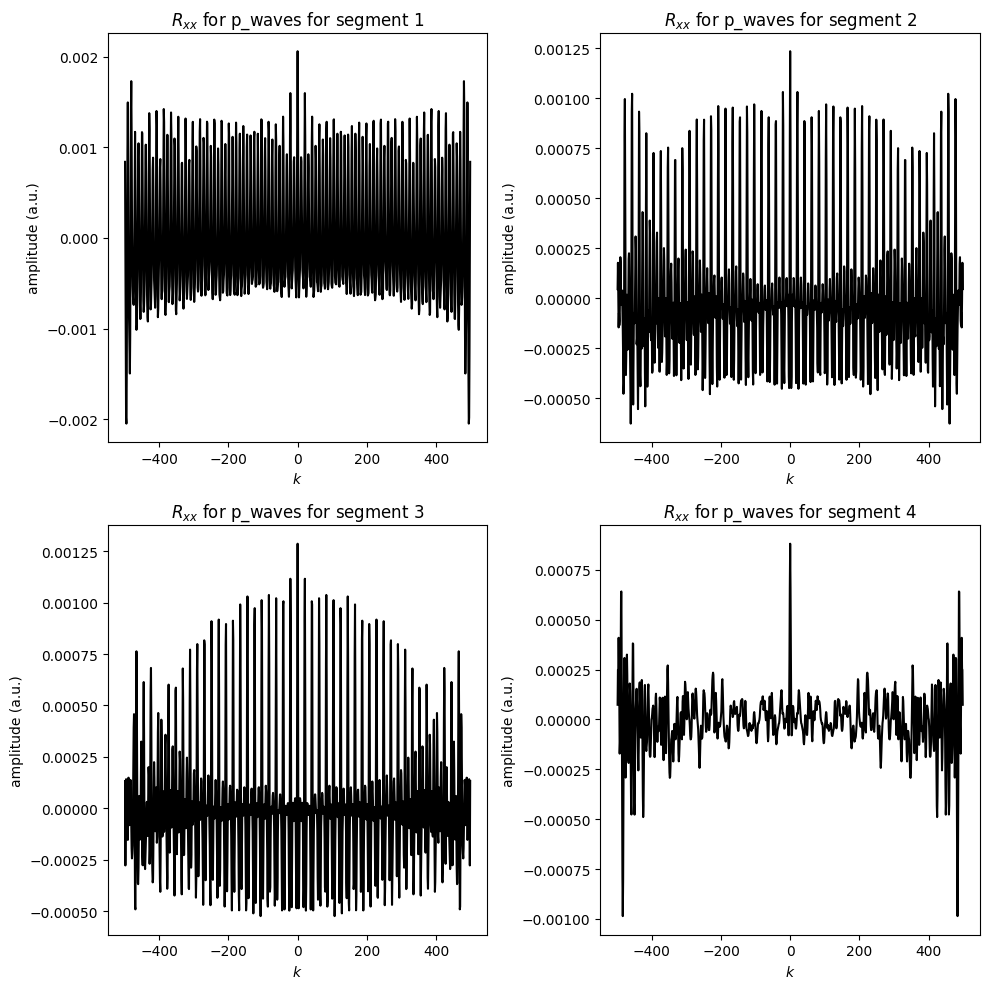

In [12]:
py.figure(5,figsize=[10,10])
for n in range(len(segments)-1):
    py.subplot(2, 2, int(n+1))
    idx = np.arange(segments[n], segments[n+1])
    rxx_p_wave = np.correlate(p_wave[idx], p_wave[idx], mode='full') 
    rxx_p_wave /= np.correlate(np.ones(len(idx)), np.ones(len(idx)), mode='full')
    k = np.arange(len(rxx_p_wave))-len(rxx_p_wave)//2
    py.plot(k, rxx_p_wave, 'k')
    py.xlabel('$k$')
    py.ylabel('amplitude (a.u.)')
    py.title('$R_{xx}$ for p_waves for segment '+str(n+1))
    py.tight_layout()

<br>
Compute the PSD of the p_wave signal.<br>

Q: What do you see?<br>
**Answer:**
- The PSD of the P wave signal for the fourth segment shows broad frequency content with less pronounced peaks, indicating disorganized atrial activity. The PSD of the P waves for the other segments (particularly segments 2 and 3) show more defined peaks, suggesting transient organization.

Q: Which one is the more organised?<br>
**Answer:**
- Segments with clear, narrow peaks in the PSD are more organized, reflecting periods of coordinated atrial repolarization. In this case we can rank the segments from more organised to less organised in the following order : segment 3, segment 2, segment 1, segment 4.

Q: Which ones look like a noise?<br>
**Answer:**
- Segments with flat, broad PSD and no distinct peaks resemble noise, typical of chaotic atrial fibrillation. Segment 4 is closer to this description.

Q: Which ones exhibit a sustained repolarisation loop?<br>
**Answer:**
- Because of atrial fibrillation, a sustained repolarization loop would be irregular. Thus this would be characterized by a broadband spectrum, because the oscillations are not consistent enough to reinforce sharp spectral lines. Segment 4 is the only one whose PSD for the p_wave exhibits this behaviour.

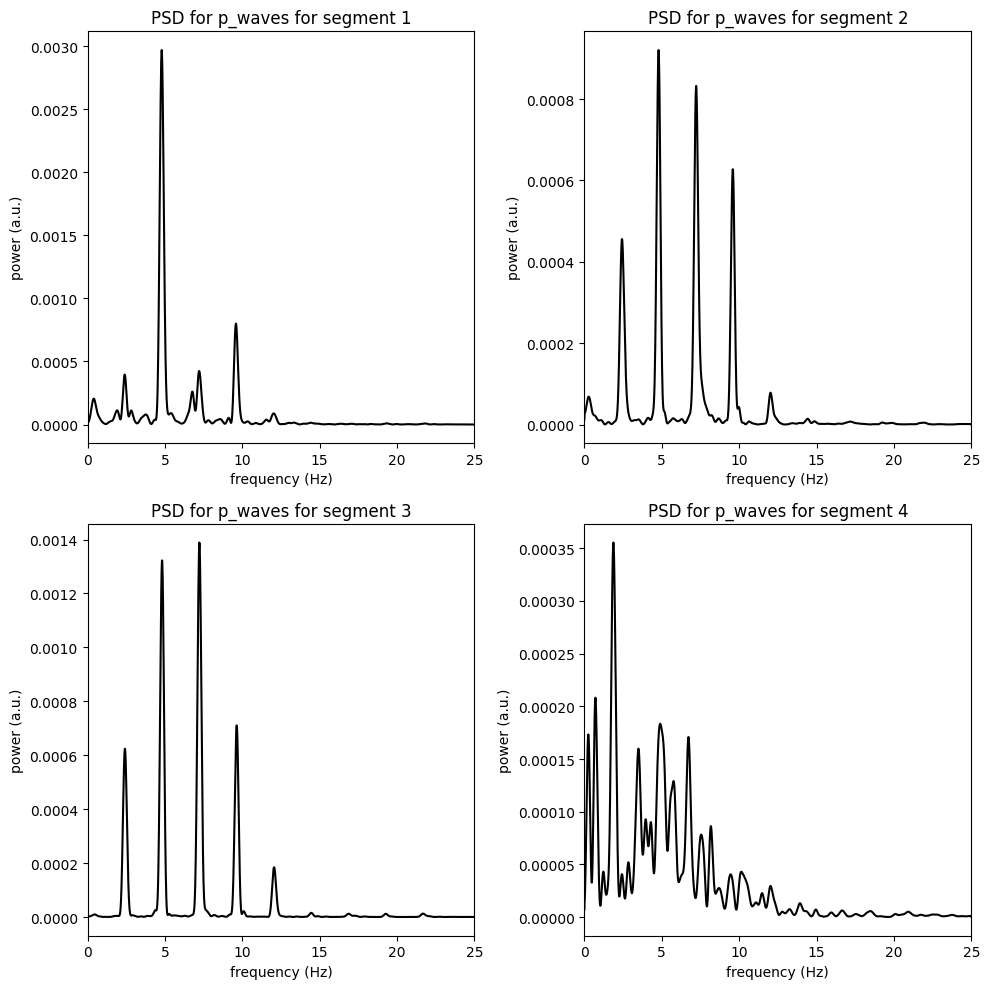

In [13]:
py.figure(7, figsize=[10,10])
for n in range(len(segments)-1):
    idx = np.arange(segments[n], segments[n+1])
    f, P_WAVE = sp.welch(p_wave[idx], nperseg=250, nfft=4096, noverlap=100, fs=p_wave_fs)
    py.subplot(2, 2, int(n+1))
    py.plot(f, P_WAVE, 'k')
    py.xlabel('frequency (Hz)')
    py.ylabel('power (a.u.)')
    py.xlim(0,25)
    py.title('PSD for p_waves for segment '+str(n+1))
    py.tight_layout()